<a href="https://colab.research.google.com/github/fabiobrambilla98/InfoRetrival/blob/main/lecture_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [4]:
np.random.seed = 42

In [5]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=1.5)

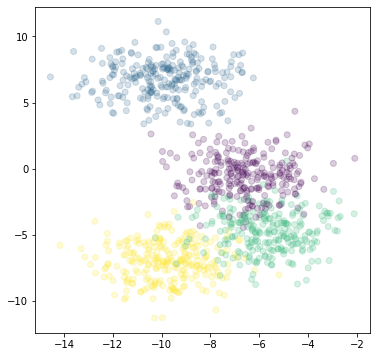

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], alpha=0.2, c=y)
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [8]:
algorithms = {
    'Kmeans': KMeans(n_clusters=4),
    'AffinityPropagation': AffinityPropagation(random_state=None, max_iter=500, convergence_iter=35),
    'Completelinkage': AgglomerativeClustering(n_clusters=4, linkage='complete'),
    'Singlelinkage': AgglomerativeClustering(n_clusters=4, linkage='single'),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}
results = {}

In [9]:
for alg, imp in algorithms.items():
    results[alg] = imp.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,


In [10]:
y[:10]

array([2, 0, 0, 1, 3, 0, 0, 2, 1, 0])

In [11]:
results['Kmeans'][:10]

array([0, 2, 2, 1, 3, 0, 2, 0, 1, 2], dtype=int32)

In [12]:
from sklearn.metrics import adjusted_rand_score

In [13]:
for alg, y_pred in results.items():
    print(alg, adjusted_rand_score(y, y_pred))

Kmeans 0.824571337949503
AffinityPropagation 0.0
Completelinkage 0.7074432742713664
Singlelinkage 1.3686626821890297e-06
DBSCAN 0.24045303144195576


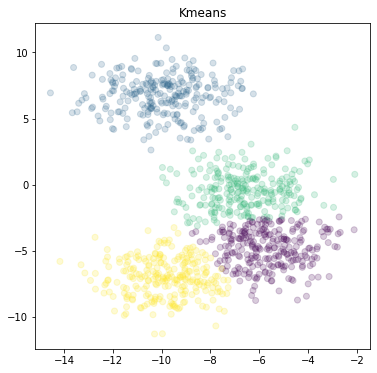

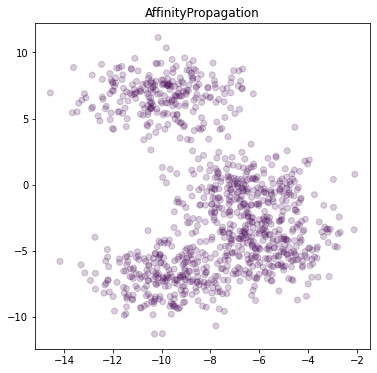

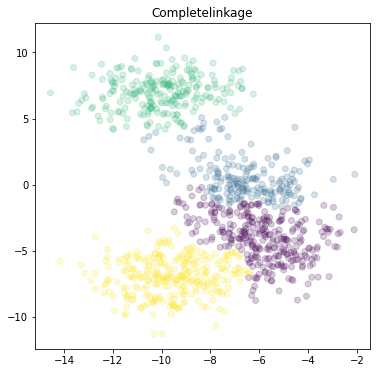

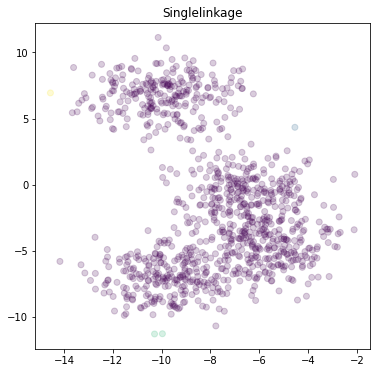

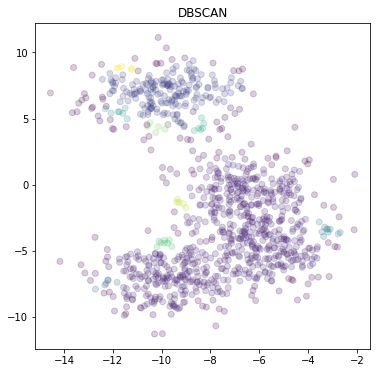

In [14]:
for alg, y_pred in results.items():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(alg)
    ax.scatter(X[:,0], X[:,1], alpha=0.2, c=y_pred)
    plt.show()